In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.init as init
from torchsummary import summary

# Data

In [39]:
#Load CFashionMIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='Data',
                                             train=True,
                                             download=True,
                                             transform= transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=10,
                                          shuffle = True,
                                          drop_last = True)

testset = torchvision.datasets.FashionMNIST(root='Data',
                                            train=False,
                                            download=True,
                                            transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1024,
                                         num_workers=10,
                                         shuffle = False)

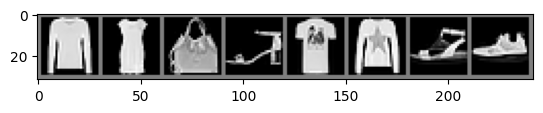

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img*0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

# Model

In [41]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256,10))

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                   [-1, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.78
Estimated Total Size (MB): 0.79
----------------------------------------------------------------


# Loss, Optimizer and Evaluate Function

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),
                       lr=0.01)

In [43]:
def evalute(model, testloader, loss_fn):
    model.eval()
    test_loss = 0.0
    running_correct = 0.0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()
    
    accuracy = running_correct *100 / total
    loss = test_loss / len(testloader)
    return loss, accuracy

# Train

In [44]:
train_losses = []
train_accuracies = []

test_losses = []
test_accuracies = []

max_epoch = 20

In [45]:
for epoch in  range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0.0
    total = 0

    for i, (images, labels ) in enumerate(trainloader, 0):

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_accuracy = running_correct * 100 / total
    epoch_loss = running_loss / (i+1)
    train_accuracies.append(epoch_accuracy)
    train_losses.append(epoch_loss)

    test_loss, test_accuracy = evalute(model, testloader, loss_fn)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/20], Loss: 0.8956, Accuracy: 71.50%, Test Loss: 0.4869, Test Accuracy: 82.43%
Epoch [2/20], Loss: 0.4193, Accuracy: 84.81%, Test Loss: 0.4188, Test Accuracy: 85.27%
Epoch [3/20], Loss: 0.3773, Accuracy: 86.37%, Test Loss: 0.4045, Test Accuracy: 85.87%
Epoch [4/20], Loss: 0.3502, Accuracy: 87.36%, Test Loss: 0.4155, Test Accuracy: 85.13%
Epoch [5/20], Loss: 0.3271, Accuracy: 88.04%, Test Loss: 0.3936, Test Accuracy: 85.94%
Epoch [6/20], Loss: 0.3168, Accuracy: 88.42%, Test Loss: 0.3824, Test Accuracy: 86.31%
Epoch [7/20], Loss: 0.3017, Accuracy: 89.00%, Test Loss: 0.3930, Test Accuracy: 86.45%
Epoch [8/20], Loss: 0.2971, Accuracy: 89.23%, Test Loss: 0.3829, Test Accuracy: 87.01%
Epoch [9/20], Loss: 0.2857, Accuracy: 89.54%, Test Loss: 0.3727, Test Accuracy: 87.07%
Epoch [10/20], Loss: 0.2720, Accuracy: 90.06%, Test Loss: 0.3761, Test Accuracy: 86.95%
Epoch [11/20], Loss: 0.2644, Accuracy: 90.27%, Test Loss: 0.3737, Test Accuracy: 87.07%
Epoch [12/20], Loss: 0.2546, Accuracy: 90

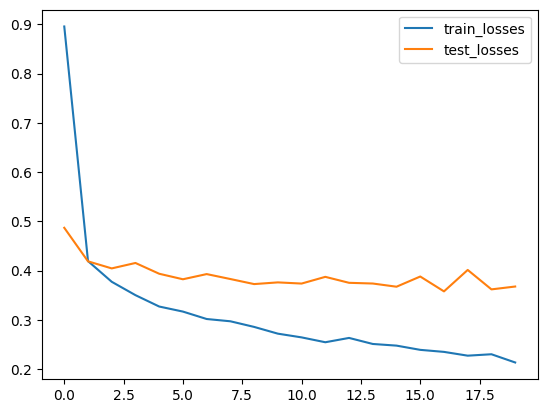

In [46]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

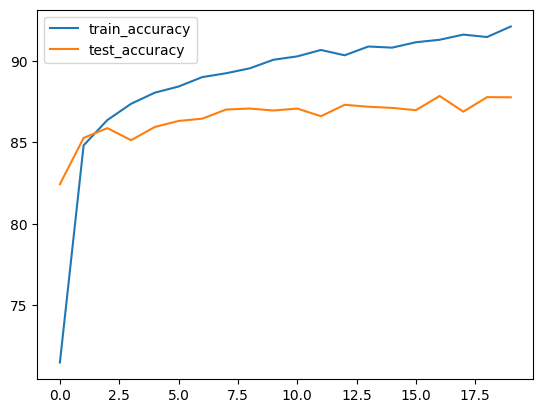

In [47]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()